In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set_palette('bright')
import nltk
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']= 10,8

In [2]:
data = pd.read_csv('hm_train.csv')
data.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60321 entries, 0 to 60320
Data columns (total 5 columns):
hmid                  60321 non-null int64
reflection_period     60321 non-null object
cleaned_hm            60321 non-null object
num_sentence          60321 non-null int64
predicted_category    60321 non-null object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [4]:
predicted_category = pd.DataFrame(data['predicted_category'].value_counts()).reset_index()
predicted_category = predicted_category.rename(columns = {'index' : 'predicted_category' ,'predicted_category': "Count" })
predicted_category

,predicted_category,Count
0,affection,20880
1,achievement,20274
2,bonding,6561
3,enjoy_the_moment,6508
4,leisure,4242
5,nature,1127
6,exercise,729


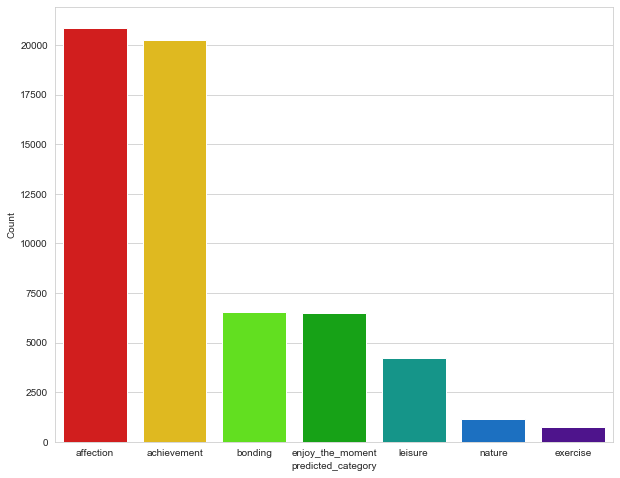

In [20]:
sns.barplot(predicted_category['predicted_category'],predicted_category['Count'],palette='nipy_spectral_r')
#CMRmap_r,nipy_spectral_r,rainbow_r,gist_ncar_r

In [6]:
data['reflection_period'].unique()

array(['24h', '3m'], dtype=object)

In [7]:
num_sentence = pd.DataFrame(data['num_sentence'].value_counts()).head(10).reset_index()
num_sentence = num_sentence.rename(columns = {'index': 'num_sentence','num_sentence' : 'Count'})#.plot(kind='bar')
num_sentence

,num_sentence,Count
0,1,49777
1,2,6030
2,3,2331
3,4,1047
4,5,493
5,6,215
6,7,125
7,8,73
8,10,41
9,9,37


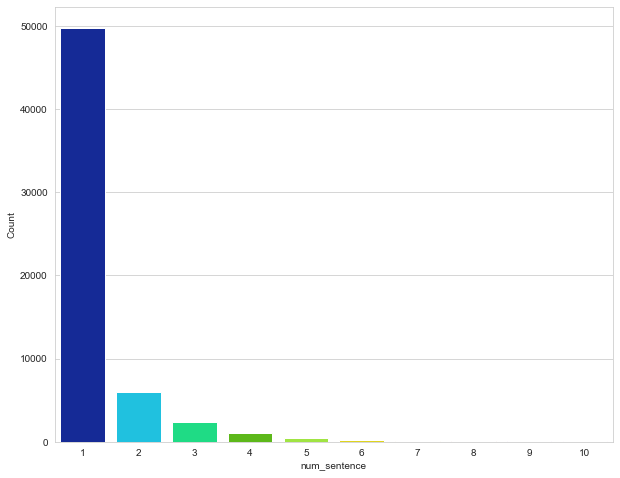

In [21]:
sns.barplot(num_sentence['num_sentence'],num_sentence['Count'],palette='gist_ncar')

In [9]:
data['text_length'] = data['cleaned_hm'].apply(lambda x:len(x.split()))

In [10]:
data.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category,text_length
0,27673,24h,I went on a successful date with someone I fel...,1,affection,14
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection,12
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise,10
3,27676,24h,We had a serious talk with some friends of our...,2,bonding,25
4,27677,24h,I went with grandchildren to butterfly display...,1,affection,10


In [11]:
data['text_length'].max()

1168

In [12]:
len(data['cleaned_hm'][0].split())

14

In [13]:
data['cleaned_hm'][0]

'I went on a successful date with someone I felt sympathy and connection with.'

In [14]:
data.query('text_length == 1 ')

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category,text_length
34394,62258,3m,#NAME?,1,achievement,1
37373,65254,3m,#NAME?,1,achievement,1
43012,70917,3m,#NAME?,1,leisure,1
44997,72917,3m,#NAME?,1,bonding,1


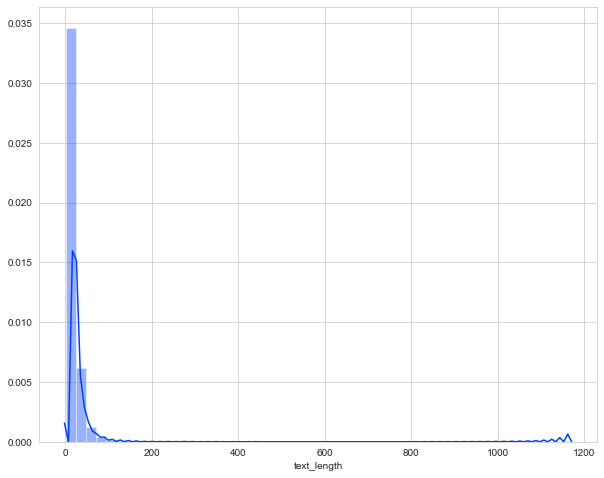

In [22]:
sns.distplot(data['text_length'],norm_hist=True)
plt.rcParams['figure.figsize'] = 10.0,8.0

# DTM

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [44]:
data['clean_text'] = data['cleaned_hm'].str.lower().str.replace('[^a-z]',' ')
data['clean_text'] = data['clean_text'].apply(lambda x: " ".join(x.split()))
data['clean_text'][1]

'i was happy when my son got marks in his examination'

In [45]:
from nltk.corpus import stopwords

In [46]:
stop = stopwords.words('english')

def sw(text):
    text = [word for word in text.split() if word not in stop]
    return " ".join(text)

data['clean_text'] = data['clean_text'].apply(sw)

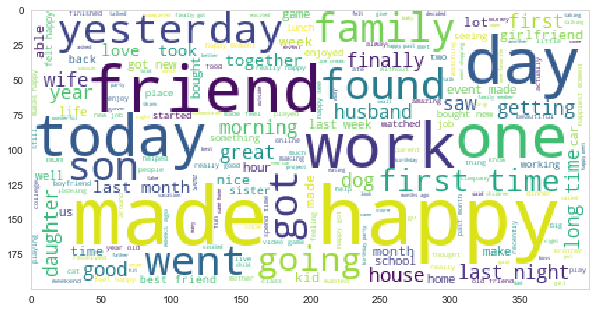

In [47]:
wc =WordCloud(background_color='white').generate(" ".join(data['clean_text']))
plt.imshow(wc)
plt.grid(False)

# Unigram

In [52]:
count_vect = CountVectorizer()
DTM = count_vect.fit(data['clean_text']).fit_transform(data['clean_text'])

In [54]:
DTM_view = pd.DataFrame(DTM.toarray(),columns=count_vect.get_feature_names())
DTM_view.head()

,aa,aaa,aadat,aadhaar,aadhar,aagra,aakshayatriya,aall,aam,aashwin,...,zone,zoo,zoom,zootopia,zoya,zskq,zucchini,zumba,zverev,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
word_frew = DTM_view.sum()
word_frew.head(10)

aa               4
aaa              2
aadat            1
aadhaar          2
aadhar           1
aagra            1
aakshayatriya    1
aall             1
aam              1
aashwin          2
dtype: int64

In [64]:
word_freq = pd.DataFrame(word_frew).reset_index()
word_freq = word_freq.rename(columns= {'index':'Word',0 : 'Frequency'}).sort_values(by = 'Frequency',ascending = False )
top_10_uni = word_freq.head(10)
top_10_uni

,Word,Frequency
7881,happy,11949
7462,got,8107
10398,made,7219
19327,went,5992
17875,time,5647
11677,new,5216
19591,work,4700
4452,day,4571
6962,friend,3817
9787,last,3777


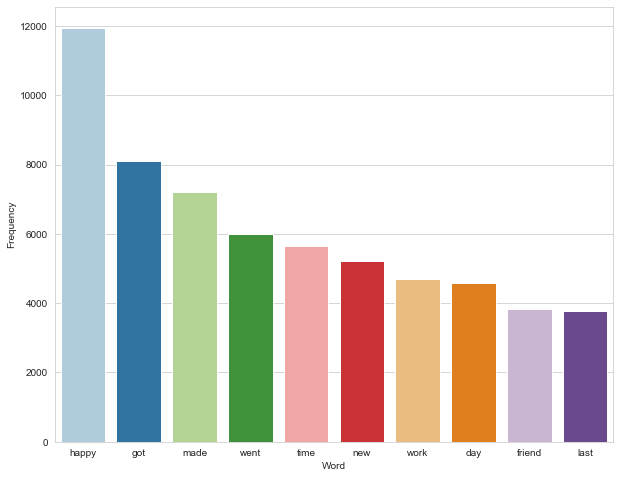

In [69]:
sns.barplot(x = 'Word',y = 'Frequency',data= top_10_uni,palette='Paired' )